In [70]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import rioxarray as rxr

from crea_graphics.colors import goodbad_cont

sns.set_context("paper")

label_font = 'Ubuntu Sans', #'Noto Sans'
mpl.rc('font',family=label_font)
# make math text not italic
mpl.rcParams['mathtext.default'] = 'regular'

cbar_fontsize = 10

In [71]:
# read geotiff

geotiff_da = rxr.open_rasterio('../data/pm25_2023_30_sec.tif')

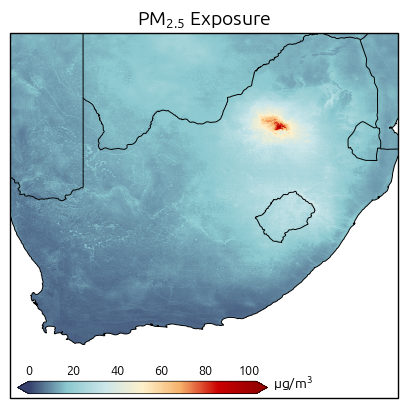

In [75]:

fig, ax = plt.subplots(figsize=(5, 7), subplot_kw={'projection': ccrs.PlateCarree()})

# set extent
ax.set_extent([17, 32.8, -37, -22.1], crs=ccrs.PlateCarree())

fh = geotiff_da.plot(ax=ax,
                cmap=goodbad_cont,
                vmin = 0,
                cbar_kwargs={'label': '', 
                     'extend': 'both', 'orientation': 'horizontal'}
                )

# add coastline
ax.coastlines(resolution='10m', color='black', linewidth=0.7, zorder = 6)

# color sea light gray
ax.add_feature(cfeature.OCEAN, facecolor='white', zorder = 5)

# add country boundaries
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=0.7, zorder = 6)

# # # colorbar


# edit colorbar properties
cbar = fh.get_figure().get_axes()[1]

# set colorbar tick locations and optics
tick_pos = np.arange(0, 120, 20)
cbar.set_xticks(tick_pos)
cbar.tick_params(labelsize=10)
cbar.set_xticklabels([f'{tick:.0f}' for tick in tick_pos], fontname=label_font, fontsize=cbar_fontsize*0.9)

# hide colorbar ticks
cbar.tick_params(width=0, length=0)

# change outline properies
cbar = fh.colorbar
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(0.5)

# set tick labels to above colorbar
cbar.ax.xaxis.set_ticks_position('top')

# move colorbar label to the right side of te colorbar
cbar.set_label(r'$\mu$g/m$^{3}$', fontname = label_font, fontsize=cbar_fontsize, labelpad = -14, x = 1.16)


# move colorbar to on top of figure, on the lower left corner
cbar.ax.set_position([0.14, 0.315, 0.5, 0.05])


# set zorder of the axis frame
ax.spines['geo'].set_zorder(10)


# 
# set title
ax.set_title(r'PM$_{2.5}$ Exposure', fontsize=14, fontname= label_font)

# save to file
plt.savefig('../figures/pm25_2023_exposure.png', dpi=300, bbox_inches='tight')